<a href="https://colab.research.google.com/github/wizard339/education/blob/main/underfitting_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. Underfitting и overfitting

### 3.1. Обобщающая способность

Рассмотрим пример классификации двух видов бабочек по двум параметрам - цвету и размаху крыльев. На первой картинке показаны исходные данные. Вы можете представить некоторую кривую, которая идеально разделяет эти два класса. Но после добавления новых точек окажется, что наша модель неспособна уловить зависимости в новых данных и допустит много ошибок. Здесь старые точки обведены в белый контур.

<img src="https://developers.google.com/machine-learning/crash-course/images/GeneralizationA.png" alt="Исходные данные" width="300" align="center"><img src="https://developers.google.com/machine-learning/crash-course/images/GeneralizationC.png" alt="После добавления новых данных" width="300" align="center">

[Источник изображений](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting)

Важной характеристикой алгоритма машинного обучения является его **обобщающая способность** — способность использовать знания, полученные при обучении, на новых данных. Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: overfitting (переобучение) и underfitting.  

Эти две проблемы зависят друг от друга, поэтому для их решения нужно решать так называемую дилемму **Bias-variance tradeoff**. Разберем обе эти проблемы и методы борьбы с ними.

### 3.2. [Bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

**Переобучение (overfitting)** — проблема, при которой алгоритм чувствителен к незначительным колебаниям в данных в процессе обучения, в следствие чего алгоритм "выучивает" слишком сложную зависимость в данных, которая на самом деле должна быть проще. Другое определение проблемы — **high variance (высокая вариативность)**. Более формальное определение можно получить из области статистики: [Variance (дисперсия случайной величины)](https://en.wikipedia.org/wiki/Variance).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/300px-Overfitting.svg.png" alt="Overfitting" width="300" align="center">

[Источник изображения](https://en.wikipedia.org/wiki/Overfitting)

**Underfitting** — проблема, при которой алгоритм недостаточно хорошо "изучил" данные и пропускает важные зависимости между признаками. Еще одно название проблемы —  **high bias (высокое смещение)**. Более формальное определение можно найти в статистике: [Bias of an estimator (Несмещенная оценка)](https://en.wikipedia.org/wiki/Bias_of_an_estimator)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


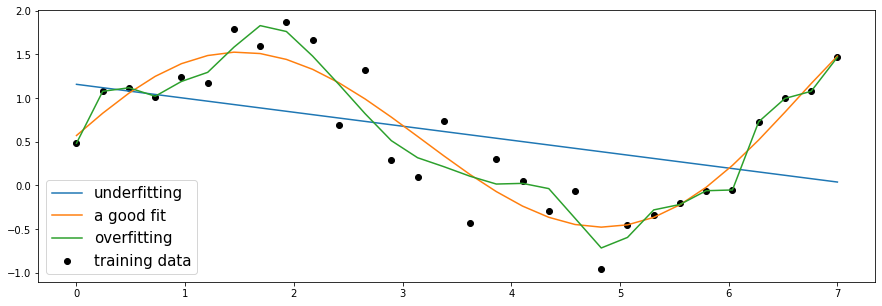

In [2]:
n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.rand(n_points)

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='k', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

### Как обнаружить переобучение

Переобучение является наиболее популярной проблемой, поэтому ее необходимо уметь обнаруживать моментально. При переобучении кривая значения функции ошибки на тренировочных данных показывает значительное убывание ошибки, в то время как на валидационной выборке значение ошибки меняется слабо, а иногда и вовсе деградирует.

![Кривые обучения при переобучении](https://developers.google.com/static/machine-learning/crash-course/images/RegularizationTwoLossFunctions.svg)  
[Источник изображения](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization)

### 3.3. Как избавиться от переобучения

Существует несколько путей ограничить переобучение, с некотороми из них мы уже познакомились:
1. Отложенная выборка (hold-out)
2. k-fold валидация (или leave-one-out валидация)
3. Уменьшение сложности модели
4. Добавление данных
5. Регуляризация

_**Отложенная выборка**_ является отличным средством проверять точность алгоритма на этапе валидации, но позволить выделить такую выборку мы можем только в случае, если обладаем достаточным объемом данных.

В случае, если данных мало, на помощь приходит _**k-fold валидация**_ или валидация с одним отложенным примером (leave-one-out). Минусы этого подхода в том, что приходится оценивать модель, используя результаты с разных подмножеств валидационных данных, поэтому не всегда очевидно, какая модель является лучшей.

_**Уменьшение сложности**_ модели является основным способом борьбы с переобучением, т.к. по сути завышенная сложность модели и является его природой. В нашем примере полином степени 30 является сложной моделью, поэтому логично заключить, что нужно уменьшить степень интерполирующего полинома.

_**Увеличение объема обучающей выборки**_ также помогает избавиться от переобучения. Представьте, как при добавлении таких же зашумленных черных точек на график выше зеленая кривая будет чаще "промахиваться" по ним и постепенно сходиться к оранжевой линии, говоря о хорошей найденной зависимости.

Еще один важный способ борьбы с переобучением — _**регуляризация**_, которая заключается в добавлении штрафа модели в случаях, когда она отклоняется от каких-то норм. 

### 3.4. Как избавиться от underfitting

Для решения проблемы underfitting можно инвертировать некоторые правила для избегания переобучения, поскольку эти две проблемы взаимозависимы. Итак, методы борьбы следующие:
1. Усложнение модели
1. Ослабевание параметров регуляризации

_**Усложнение модели**_ в данном случае поможет, т.к. простая модель может плохо описывать сложные закономерности. Примером усложнения может быть добавление новых признаков в данные, увеличение степени полинома, добавление новых слоев в нейронную сеть и др.

_**Ослабевание параметров регуляризации**_ есть не что иное как уменьшение размера штрафа на модель в случае ее отклонения от некоторых норм. Настройка параметров регуляризации будет также рассмотрена далее в курсе.

### 3.5. Пример обучения

Здесь мы рассмотрим пример обучения дерева решений. В качестве датасета возьмем известный датасет [A Titanic Probability](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

#### 3.5.1. Валидация на hold-out выборке

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

In [ ]:
clf = DecisionTreeClassifier(random_state=456)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=456,
            splitter='best')

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train))

[train] F1-score = 0.98


In [ ]:
y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)
print('[valid] F1-score = {:.2f}'.format(f1_val))

[valid] F1-score = 0.71


Как видим, точность при валидации значительно ниже точности при обучении. Проверим это дополнительно с помощью кросс-валидации:

#### 3.5.2. Кросс-валидация

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
clf = DecisionTreeClassifier(random_state=456)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)

In [ ]:
def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize=(15, 5))

    plt.plot(cv_metrics['train_score'], label='train', marker='.')
    plt.plot(cv_metrics['test_score'], label='valid', marker='.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize=15)
    plt.ylabel('F1-score', fontsize=15)
    plt.legend(fontsize=15)

[train] F1-score = 0.98 +/- 0.00
[valid] F1-score = 0.78 +/- 0.04


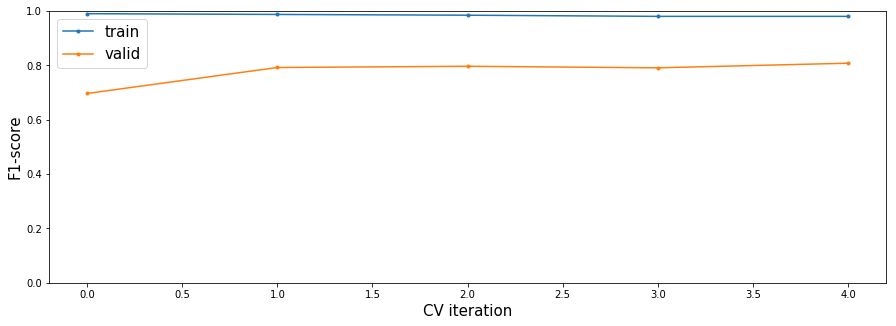

In [ ]:
plot_cv_metrics(cv_metrics)

Гипотеза о переобучении подтвердилась. Попробуем избавиться от него, упростив модель — в данном случае ограничим глубину дерева:

[train] F1-score = 0.86 +/- 0.01
[valid] F1-score = 0.83 +/- 0.02


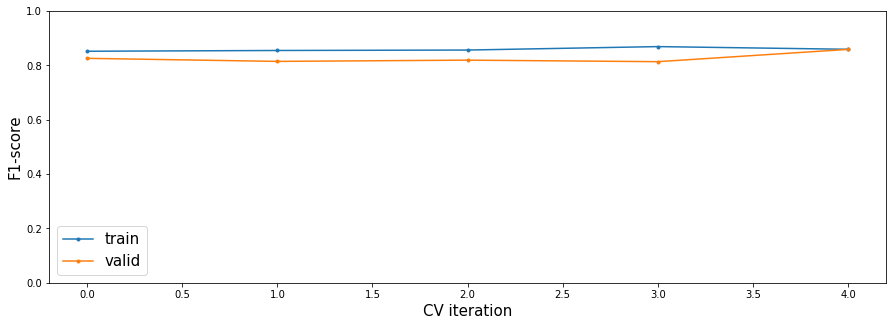

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=456)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)
plot_cv_metrics(cv_metrics)

Итак, метрики при обучении и валидации практически сравнялись, к тому же на валидации значение точности стало выше. Теперь возникает законный вопрос — а можно ли улучшить точность предсказаний? Вполне вероятно, что в данном случае присутствует проблема underfitting. Для ее решения можно заняться созданием новых признаков.